In [1]:
!pip install qutip

In [2]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [3]:
# make qutip available in the rest of the notebook
from qutip import *
from numpy import *
from scipy import *

In [4]:
wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency

N = 15              # number of cavity fock states
use_rwa = False

In [5]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity

In [6]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa* (0*sx1 + 10*sz1)      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

In [7]:
g_vec = np.linspace(0, 5.0, 101) * 2 * pi # coupling strength vector

psi_list = []

for g in g_vec:

    H = Ho + Hq + g * H1

    # find the groundstate and its energy
    gnd_energy, gnd_state = H.groundstate()
    
    # store the ground state
    psi_list.append(gnd_state)

In [8]:
na_expt = expect(na, psi_list) # qubit  occupation probability
nc_expt = expect(nc, psi_list) # cavity occupation probability

In [9]:
g_idx = np.where([g_vec == 2*pi*g for g in [0.5, 2.0, 2.5, 3.5]])[1]
psi_sublist = []
for s in g_idx :
  psi_sublist.append(psi_list[s])

xvec = np.linspace(-5,5,200)

<Figure size 144x144 with 0 Axes>

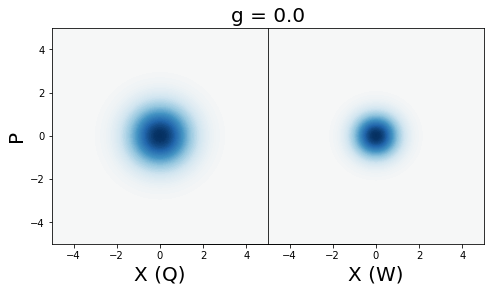

<Figure size 144x144 with 0 Axes>

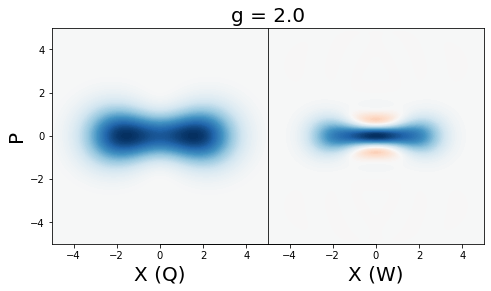

<Figure size 144x144 with 0 Axes>

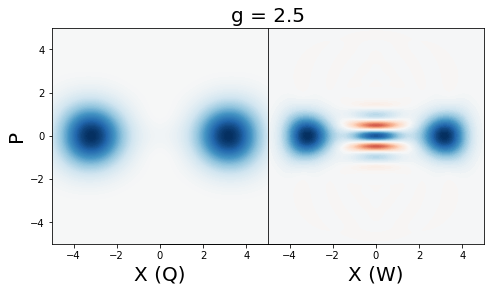

<Figure size 144x144 with 0 Axes>

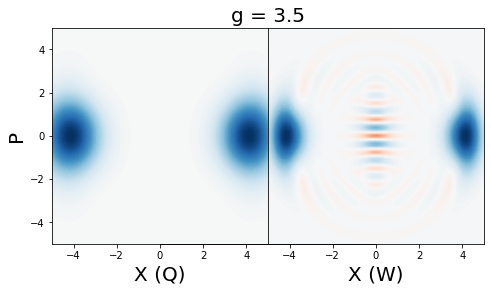

In [10]:
W_l = []
Q_l = []
g_idx =[0, 2.0, 2.5, 3.5]
for n in [0,1,2,3]:
    psi = ptrace(psi_sublist[n], 0)
    W = wigner(psi, xvec, xvec)
    Q = qfunc(psi, xvec, xvec)
    W_l.append(W)
    Q_l.append(Q)
    wmap = wigner_cmap(W)
    nrm = mpl.colors.Normalize(-W.max(),W.max())
    nrmq = mpl.colors.Normalize(-Q.max(),Q.max())
    fig = plt.figure(figsize=(2,2))

    fig = plt.figure(figsize=(3,3))
    axes2 = fig.add_axes([0.5,0,1,1])
    axes = fig.add_axes([0,0,1,1])
    axes1 = fig.add_axes([1,0,1,1])

    axes2.set_title('g = %.1f' % (g_idx[n]), fontsize=20)
    axes2.set_xticks([])
    axes2.set_yticks([])

    axes.set_facecolor('y')
    axes.contourf(xvec, xvec, Q, 100, cmap=plt.get_cmap('RdBu'), norm=nrmq)
    axes.set_ylabel(r"P", fontsize=20)
    axes.set_xlabel(r"X (Q)", fontsize=20)

    axes1.set_yticks([])
    axes1.contourf(xvec, xvec, W, 100, cmap=plt.get_cmap('RdBu'), norm=nrm)
    axes1.set_xlabel(r"X (W)", fontsize=20)